# Deeplizard tutorial part 1

## Preparation preprocessing

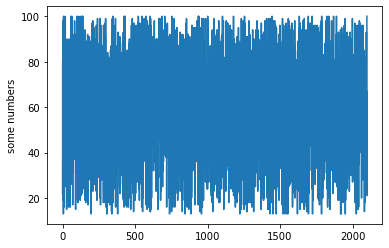

In [17]:
import itertools
import json
import os
from random import randint

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.models import load_model


train_samples = []
train_labels = []

for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_younger = randint(65,100)
    train_samples.append(random_younger)
    train_labels.append(0)

for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_younger = randint(65,100)
    train_samples.append(random_younger)
    train_labels.append(1)

plt.plot(train_samples)
plt.ylabel('some numbers')
plt.show()

train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

train_labels, train_samples = shuffle(train_labels, train_samples)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

## Dati per il test
In questo caso di esempio è identico alla creazione dei dati "reali"

In [18]:
test_samples = []
test_labels = []

for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_younger = randint(65,100)
    test_samples.append(random_younger)
    test_labels.append(0)

for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_younger = randint(65,100)
    test_samples.append(random_younger)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

test_labels, test_samples = shuffle(test_labels, test_samples)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## GPU setup

In [19]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPU available", len(gpus))
# tf.config.experimental.set_memory_growth(gpus[0], True)

## Simple keras sequential model

In [20]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
210/210 - 0s - loss: 0.6710 - accuracy: 0.5419
Epoch 2/30
210/210 - 0s - loss: 0.6398 - accuracy: 0.6419
Epoch 3/30
210/210 - 0s - loss: 0.6041 - accuracy: 0.7300
Epoch 4/30
210/210 - 0s - loss: 0.5586 - accuracy: 0.8090
Epoch 5/30
210/210 - 0s - loss: 0.5160 - accuracy: 0.8462
Epoch 6/30
210/210 - 0s - loss: 0.4759 - accuracy: 0.8743
Epoch 7/30
210/210 - 0s - loss: 0.4393

## Build validation set
Dobbiamo estrarre una parte di dati che potremo poi utilizzare per testare il nostro modello. In questo modo possiamo vedere quanto il nostro modello sia generico e possa essere utilizzato con successo su nuovi dati. Questi dati non potranno essere utilizzati per il training.

Dobbiamo ricordare che lo shuffle automatico dato dal parametro `shuffle=true` viene fatto dopo l'estrazione dei dati di validazione. Se non abbiamo già eseguito uno shuffle sul nostro campione, ci ritroviamo magari ad avere tutti i pazienti malati alla fine e di conseguenza un set di validazione con solo pazienti malati.

Dobbiamo sempre ricordarci di fare uno shuffle manuale prima di estrarre i dati di validazione.

In [21]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2, validation_split=.1)

Epoch 1/30
189/189 - 0s - loss: 0.2493 - accuracy: 0.9354 - val_loss: 0.2568 - val_accuracy: 0.9286
Epoch 2/30
189/189 - 0s - loss: 0.2486 - accuracy: 0.9381 - val_loss: 0.2568 - val_accuracy: 0.9286
Epoch 3/30
189/189 - 0s - loss: 0.2480 - accuracy: 0.9344 - val_loss: 0.2559 - val_accuracy: 0.9286
Epoch 4/30
189/189 - 0s - loss: 0.2472 - accuracy: 0.9386 - val_loss: 0.2555 - val_accuracy: 0.9286
Epoch 5/30
189/189 - 0s - loss: 0.2465 - accuracy: 0.9386 - val_loss: 0.2550 - val_accuracy: 0.9286
Epoch 6/30
189/189 - 0s - loss: 0.2458 - accuracy: 0.9370 - val_loss: 0.2537 - val_accuracy: 0.9333
Epoch 7/30
189/189 - 0s - loss: 0.2453 - accuracy: 0.9397 - val_loss: 0.2540 - val_accuracy: 0.9286
Epoch 8/30
189/189 - 0s - loss: 0.2446 - accuracy: 0.9386 - val_loss: 0.2539 - val_accuracy: 0.9286
Epoch 9/30
189/189 - 0s - loss: 0.2440 - accuracy: 0.9386 - val_loss: 0.2532 - val_accuracy: 0.9286
Epoch 10/30
189/189 - 0s - loss: 0.2435 - accuracy: 0.9386 - val_loss: 0.2535 - val_accuracy: 0.9286

## Predict

In [22]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)
print(predictions)

rounded_predictions = np.argmax(predictions, axis=-1)

print(rounded_predictions)


[[0.37751615 0.62248385]
 [0.96140945 0.03859056]
 [0.9763035  0.02369648]
 [0.9053862  0.09461378]
 [0.17349455 0.8265055 ]
 [0.97416997 0.02582996]
 [0.07973704 0.92026293]
 [0.9431734  0.0568266 ]
 [0.01514197 0.98485804]
 [0.10791207 0.89208794]
 [0.07382642 0.92617357]
 [0.0584364  0.94156367]
 [0.9755245  0.0244756 ]
 [0.87491757 0.12508242]
 [0.9737497  0.02625032]
 [0.9702561  0.02974387]
 [0.01514197 0.98485804]
 [0.9755245  0.0244756 ]
 [0.10791207 0.89208794]
 [0.0276372  0.9723628 ]
 [0.02564633 0.9743536 ]
 [0.01403821 0.98596174]
 [0.08607686 0.91392314]
 [0.02207496 0.97792506]
 [0.97512555 0.02487447]
 [0.97389054 0.02610947]
 [0.9491732  0.05082671]
 [0.0297779  0.97022206]
 [0.9637033  0.03629679]
 [0.07973704 0.92026293]
 [0.97140515 0.02859481]
 [0.02379537 0.9762046 ]
 [0.7281456  0.27185437]
 [0.9167539  0.08324615]
 [0.63664967 0.36335033]
 [0.9737497  0.02625032]
 [0.97617537 0.02382464]
 [0.02379537 0.9762046 ]
 [0.37751615 0.62248385]
 [0.24293074 0.75706923]


## Result visualization

Utilizzando una confusion matrix possiamo visualizzare i risultati così da poterli valutare.

Confusion matrix without normalization
[[195  15]
 [ 10 200]]


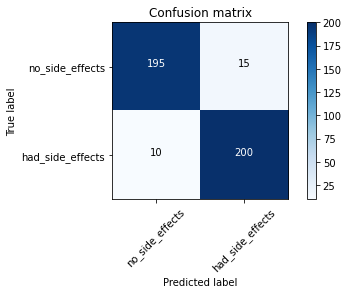

In [23]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Questa funzione stampa una confusion matrix, la normalizzazione può essere applicata tramite il parametro `normalize=True`.
    :param cm:
    :param classes:
    :param normalize:
    :param title:
    :param cmap:
    :return:
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, classes=cm_plot_labels, title="Confusion matrix")

## Save and load models

La funzione di salvataggio salva:

- L'architettura del modello, permettendo di ricreare il modello
- I pesi del modello
- La configurazione di training del modello (loss, optimizer)
- Lo stato dell'optimizer, permettendo di iniziare nuovamente il training da dove si era rimasti

In [24]:
model_path = 'models'
model_file_name = 'medical_trial_model'
model_ext = 'h5'
complete_file_name = '{}/{}.{}'.format(model_path, model_file_name, model_ext)
if os.path.isfile(complete_file_name) is False:
    model.save(complete_file_name)

new_model = load_model(complete_file_name)

new_model.summary()
new_model.get_weights()

json_string = model.to_json()
model_ext = 'json'
complete_file_name = '{}/{}.{}'.format(model_path, model_file_name, model_ext)
with open(complete_file_name, 'w') as outfile:
    outfile.write(json_string)

yaml_string = model.to_yaml()
model_ext = 'yaml'
complete_file_name = '{}/{}.{}'.format(model_path, model_file_name, model_ext)
with open(complete_file_name, 'w') as outfile:
    outfile.write(yaml_string)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
